<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

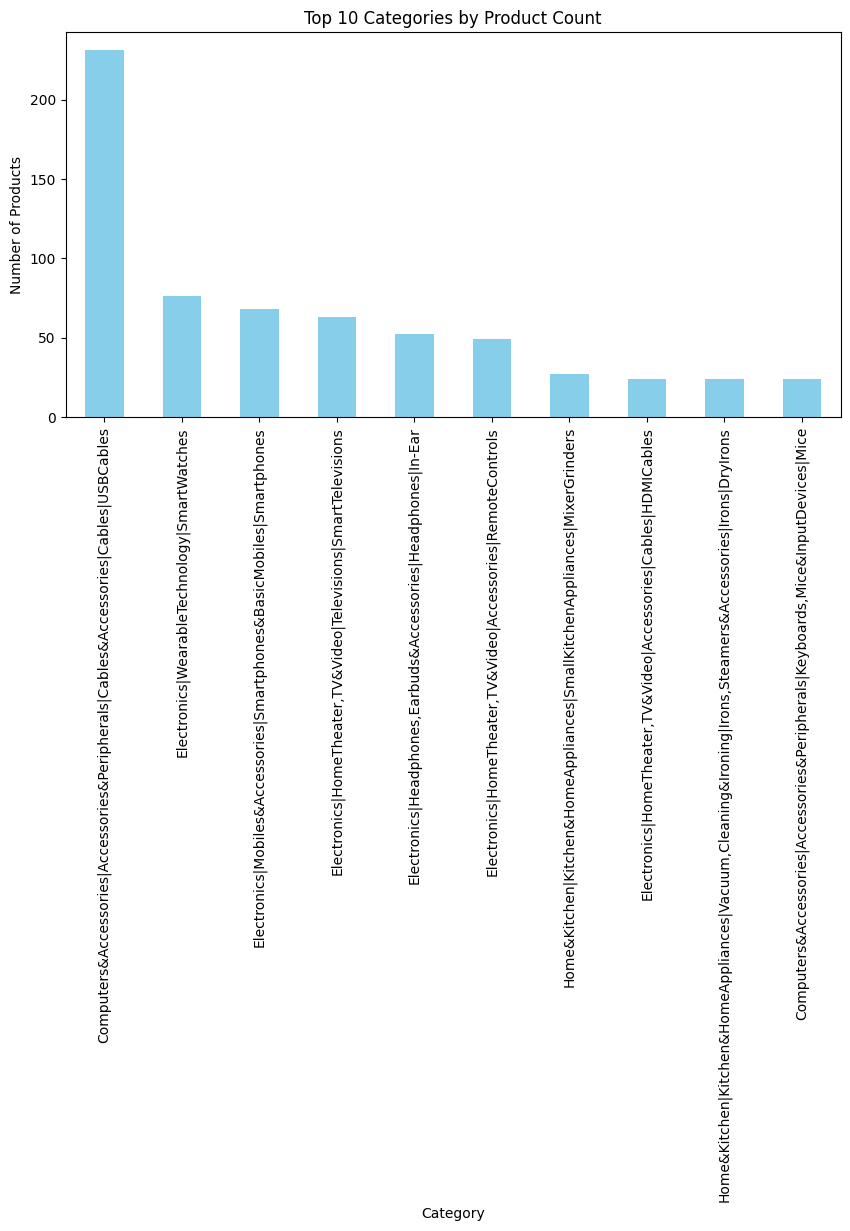

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")
df.info()
df.describe()
df.dropna(inplace=True)

# convert numeric columns to proper data types

#convert price and discount to numeric
df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["actual_price"]=df["actual_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["discount_percentage"]=df["discount_percentage"].str.replace("%", "").astype(float)

#convert rating and rating_count to numeric
df["rating"]=pd.to_numeric(df["rating"], errors='coerce')
df["rating_count"]=pd.to_numeric(df["rating_count"], errors='coerce')

df.isnull().sum()  # Check missing values
df.fillna(0, inplace=True)  # Replace NaNs with 0 (or another strategy)






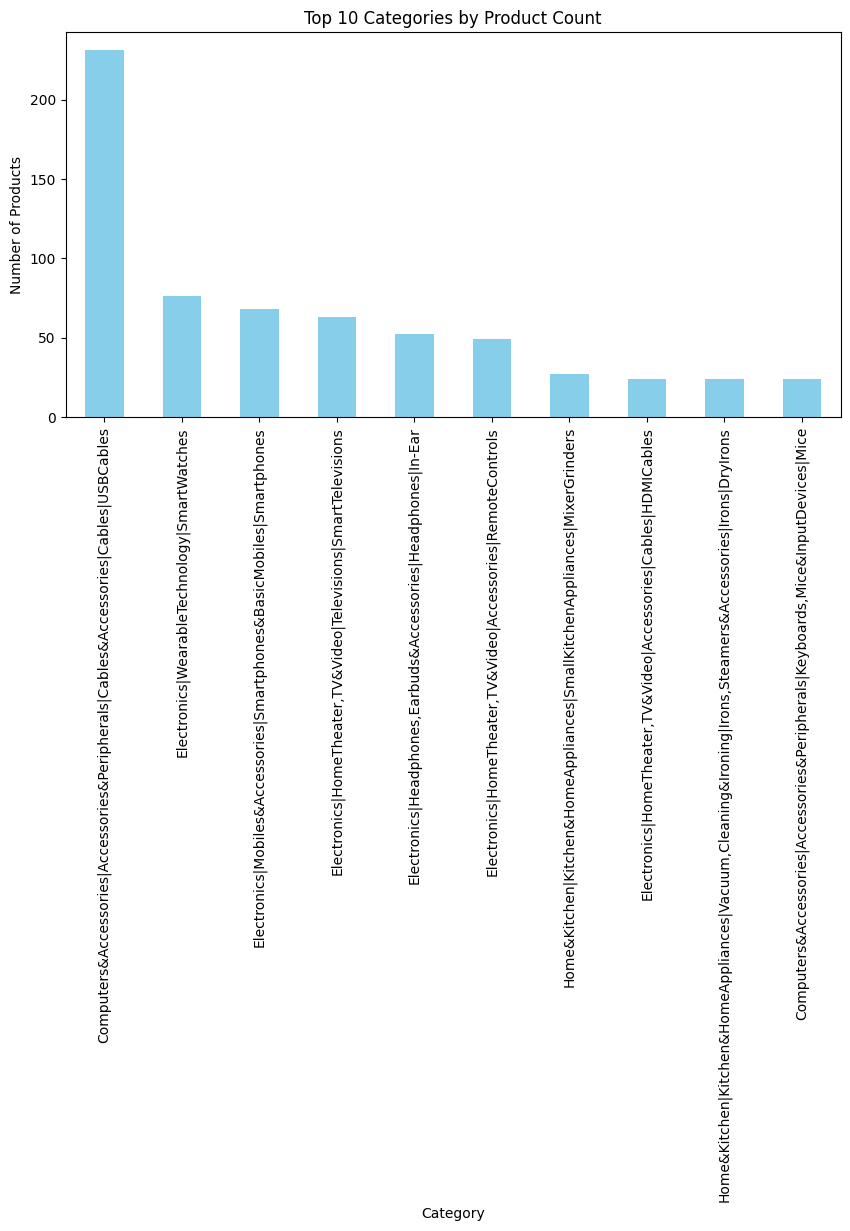

In [2]:
import matplotlib.pyplot as plt

top_categories = df["category"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_categories.plot(kind="bar", color="skyblue")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Top 10 Categories by Product Count")
plt.show()

In [ ]:
##top categories by sales

top_categories = df["category"].value_counts().head(10)
plt.figure(figsize=(10,5))
top_categories.plot(kind="bar",color="skyblue")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.title("Top 10 categories by product count")
plt.show()